<a href="https://colab.research.google.com/github/k-messick/visualization/blob/main/visualization_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment: Exploratory Data Analysis
### `! git clone https://github.com/ds4e/visualization`
### Do One.

**Q1.** This question provides some practice doing exploratory data analysis and visualization.

The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `./data/college_completion.csv` data with Pandas.
2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
3. Cross tabulate `control` and `level`. Describe the patterns you see.
4. For `grad_100_value`, create a histogram, kernel density plot, boxplot, and statistical description.
5. For `grad_100_value`, create a grouped kernel density plot by `control` and by `level`. Describe what you see. Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `grad_100_value` by `level` and `control`. Which institutions appear to have the best graduation rates?
6. Create a new variable, `df['levelXcontrol']=df['level']+', '+df['control']` that interacts level and control. Make a grouped kernel density plot. Which institutions appear to have the best graduation rates?
7. Make a kernel density plot of `aid_value`. Now group your graph by `level` and `control`. What explains the shape of the graph? Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `aid_value` by `level` and `control`.
8. Make a scatterplot of `grad_100_value` by `aid_value`. Describe what you see. Now make the same plot, grouping by `level` and then `control`. Describe what you see. For which kinds of institutions does aid seem to increase graduation rates?

1.

In [1]:
#Load data
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('/content/college_completion.csv')

2.

In [3]:
#Data dimesions: shape
df.shape

(3798, 63)

In [4]:
#Data dimesions: observations
df.shape[0]

3798

In [5]:
#Data dimesions: variables included
df.columns.tolist()

['index',
 'unitid',
 'chronname',
 'city',
 'state',
 'level',
 'control',
 'basic',
 'hbcu',
 'flagship',
 'long_x',
 'lat_y',
 'site',
 'student_count',
 'awards_per_value',
 'awards_per_state_value',
 'awards_per_natl_value',
 'exp_award_value',
 'exp_award_state_value',
 'exp_award_natl_value',
 'exp_award_percentile',
 'ft_pct',
 'fte_value',
 'fte_percentile',
 'med_sat_value',
 'med_sat_percentile',
 'aid_value',
 'aid_percentile',
 'endow_value',
 'endow_percentile',
 'grad_100_value',
 'grad_100_percentile',
 'grad_150_value',
 'grad_150_percentile',
 'pell_value',
 'pell_percentile',
 'retain_value',
 'retain_percentile',
 'ft_fac_value',
 'ft_fac_percentile',
 'vsa_year',
 'vsa_grad_after4_first',
 'vsa_grad_elsewhere_after4_first',
 'vsa_enroll_after4_first',
 'vsa_enroll_elsewhere_after4_first',
 'vsa_grad_after6_first',
 'vsa_grad_elsewhere_after6_first',
 'vsa_enroll_after6_first',
 'vsa_enroll_elsewhere_after6_first',
 'vsa_grad_after4_transfer',
 'vsa_grad_elsewhere_a

In [6]:
df.head()

,index,unitid,chronname,city,state,level,control,basic,hbcu,flagship,...,vsa_grad_after6_transfer,vsa_grad_elsewhere_after6_transfer,vsa_enroll_after6_transfer,vsa_enroll_elsewhere_after6_transfer,similar,state_sector_ct,carnegie_ct,counted_pct,nicknames,cohort_size
0,0,100654,Alabama A&M University,Normal,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,36.4,5.6,17.2,11.1,232937|100724|405997|113607|139533|144005|2285...,13,386,99.7|07,NaN,882.0
1,1,100663,University of Alabama at Birmingham,Birmingham,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,NaN,NaN,NaN,NaN,196060|180461|201885|145600|209542|236939|1268...,13,106,56.0|07,UAB,1376.0
2,2,100690,Amridge University,Montgomery,Alabama,4-year,Private not-for-profit,Baccalaureate Colleges--Arts & Sciences,NaN,NaN,...,NaN,NaN,NaN,NaN,217925|441511|205124|247825|197647|221856|1353...,16,252,100.0|07,NaN,3.0
3,3,100706,University of Alabama at Huntsville,Huntsville,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,0.0,0.0,0.0,0.0,232186|133881|196103|196413|207388|171128|1900...,13,106,43.1|07,UAH,759.0
4,4,100724,Alabama State University,Montgomery,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,NaN,NaN,NaN,NaN,100654|232937|242617|243197|144005|241739|2354...,13,386,88.0|07,ASU,1351.0


3.

In [7]:
#Cross-tabulate control and level
control_level_crosstab = pd.crosstab(df['control'], df['level'])
control_level_crosstab

level,2-year,4-year
control,,
Private for-profit,465,527
Private not-for-profit,68,1180
Public,926,632


It seems that whether private was for-profit or not-for profit, 4-year institutions had higher graduation rates, compared to public, which had higher graduation rates for 2-years.

4.

Text(0.5, 1.0, 'Histogram of Graduation Rates')

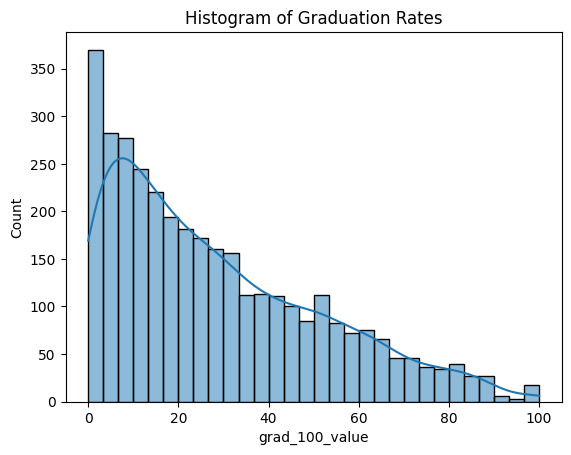

In [48]:
#Histogram
sns.histplot(df['grad_100_value'], bins=30, kde=True)
plt.title('Histogram of Graduation Rates')

Text(0.5, 1.0, 'Kernel Density Plot of Graduation Rates')

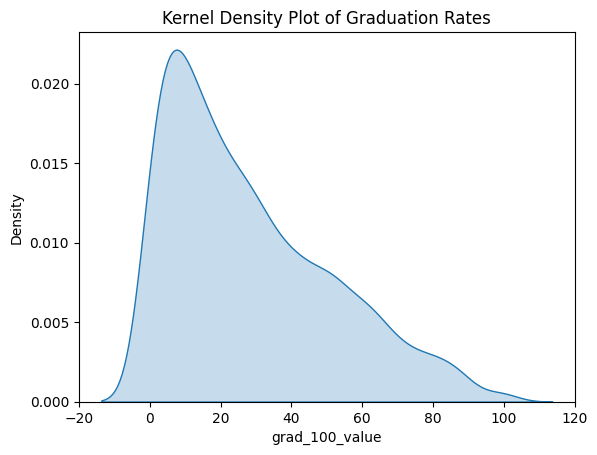

In [49]:
#Kernal desnity
sns.kdeplot(df['grad_100_value'], fill=True)
plt.title('Kernel Density Plot of Graduation Rates')

Text(0.5, 1.0, 'Boxplot of Graduation Rates')

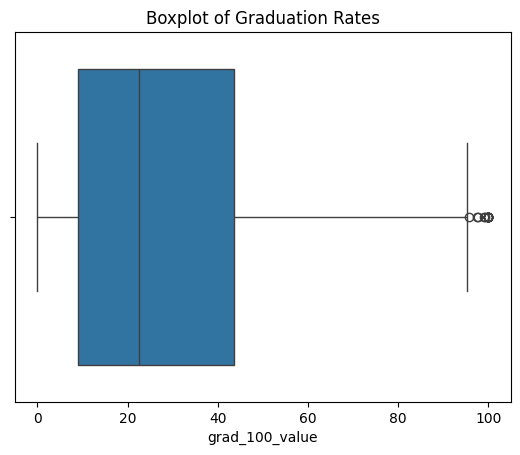

In [50]:
#Boxplot
sns.boxplot(x=df['grad_100_value'])
plt.title('Boxplot of Graduation Rates')

In [51]:
#Statistical description
df['grad_100_value'].describe()

,grad_100_value
count,3467.000000
mean,28.364465
std,23.312730
min,0.000000
25%,9.000000
50%,22.500000
75%,43.650000
max,100.000000


5.

[Text(0.5, 1.0, 'Kernel Density Plot of Graduation Rates by Level')]

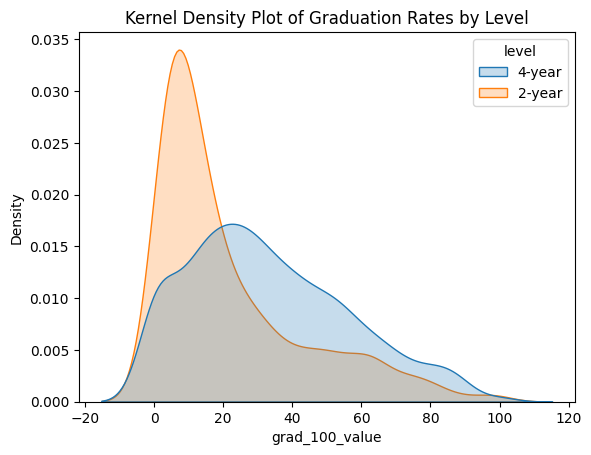

In [52]:
#Grouped kernel density plot by level
sns.kdeplot(data=df, x='grad_100_value', hue='level', fill=True, common_norm=False).set(title='Kernel Density Plot of Graduation Rates by Level')

[Text(0.5, 1.0, 'Kernel Density Plot of Graduation Rates by Control')]

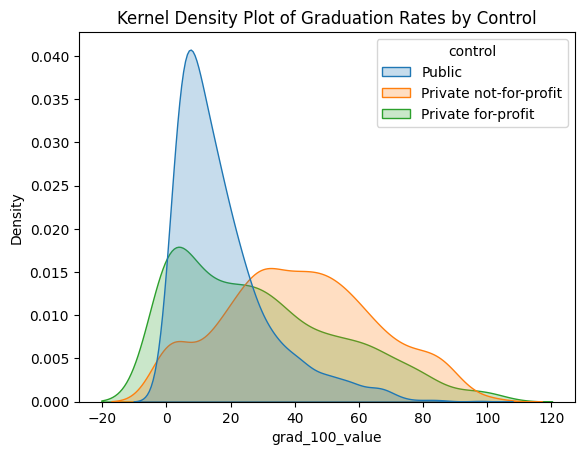

In [45]:
#Grouped kernel density plot by control
sns.kdeplot(data=df, x='grad_100_value', hue='control', fill=True, common_norm=False).set(title='Kernel Density Plot of Graduation Rates by Control')

There seems to be a lot more graduation values for 2-year  institutions and public institutions.

In [23]:
#Grouped calculations
grouped_description = df.groupby(['level', 'control'])['grad_100_value'].describe()
grouped_description

count       mean        std  min     25%  \
level  control                                                             
2-year Private for-profit       461.0  37.197614  25.497380  0.0  15.800   
       Private not-for-profit    68.0  41.913235  28.348302  0.0  16.225   
       Public                   926.0  12.400000  10.893600  0.0   5.100   
4-year Private for-profit       318.0  17.382704  20.788525  0.0   0.000   
       Private not-for-profit  1121.0  41.645674  23.243453  0.0  25.000   
       Public                   573.0  25.561082  16.403902  0.0  13.600   

                                50%     75%    max  
level  control                                      
2-year Private for-profit      33.9  57.800  100.0  
       Private not-for-profit  44.4  61.200  100.0  
       Public                   9.4  16.175   97.8  
4-year Private for-profit      12.5  26.325  100.0  
       Private not-for-profit  41.0  57.800  100.0  
       Public                  21.8  33.800   86.3

For 2-year institutions, it seems public schools have the best graduation rate. For 4-year institutions, private not-for-profit have the highest graduation rate.

6.

In [25]:
#New variable that interacts level and control
df['levelXcontrol'] = df['level'] + ', ' + df['control']


[Text(0.5, 1.0, 'Kernel Density Plot of Graduation Rates by Level and Control')]

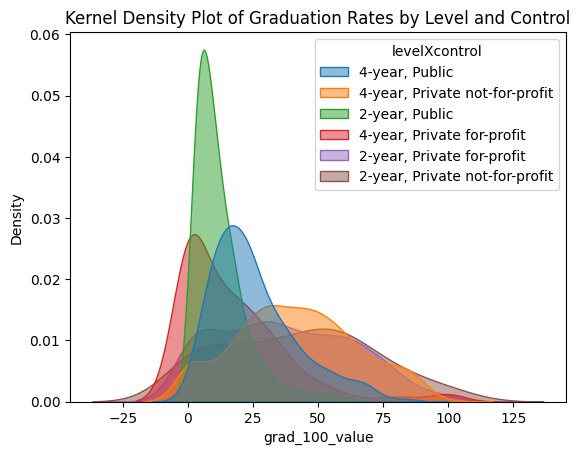

In [26]:
sns.kdeplot(data=df, x='grad_100_value', hue='levelXcontrol', fill=True, common_norm=False, alpha=0.5).set(title='Kernel Density Plot of Graduation Rates by Level and Control')

It seems once again, 2 year public institutions have the best graduation rates. 4-year private for-profit and 4-year public are almost tied for also having good graduation rates.

7.

[Text(0.5, 1.0, 'Kernel Density Plot of Aid Value')]

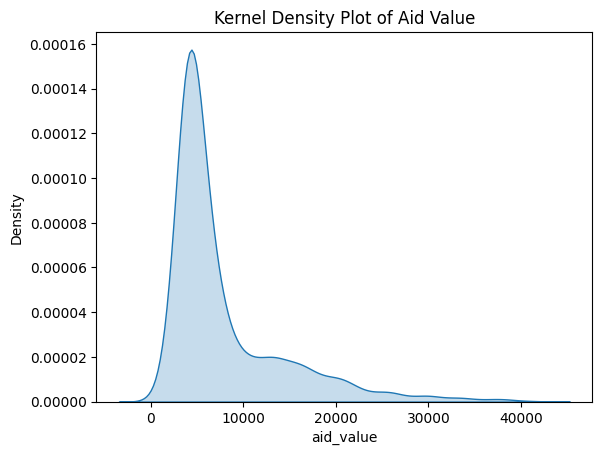

In [27]:
#Kernel density plot of aid_value
sns.kdeplot(data=df, x='aid_value', fill=True).set(title='Kernel Density Plot of Aid Value')

[Text(0.5, 1.0, 'Kernel Density Plot of Aid Value Grouped by Level and Control')]

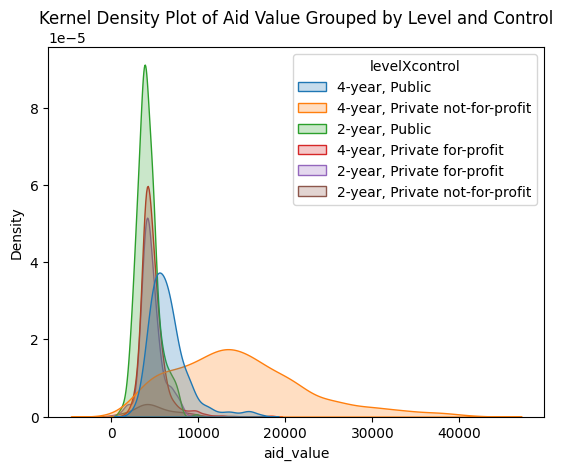

In [47]:
#Grouped by level and control
sns.kdeplot(data=df, x='aid_value', hue='levelXcontrol', fill=True).set(title='Kernel Density Plot of Aid Value Grouped by Level and Control')

The shape of the graph is a lot slimmer, which can be explained by there being less observations in the subset compared to the full dataset.

In [29]:
#Grouped by level and control
aid_value = df.groupby(['level', 'control'])['aid_value'].describe()
aid_value

count          mean          std     min  \
level  control                                                             
2-year Private for-profit       464.0   4559.681034  1286.688269   294.0   
       Private not-for-profit    68.0   5128.058824  2590.449946   934.0   
       Public                   926.0   4126.199784  1260.271382   881.0   
4-year Private for-profit       527.0   4696.062619  1489.410020  1580.0   
       Private not-for-profit  1180.0  14702.401695  7649.775203   902.0   
       Public                   632.0   6514.071203  2353.716693  2232.0   

                                   25%      50%       75%      max  
level  control                                                      
2-year Private for-profit      3818.75   4286.5   5122.00   9727.0  
       Private not-for-profit  3650.00   4516.5   6311.50  13654.0  
       Public                  3311.25   3943.5   4762.00   9809.0  
4-year Private for-profit      3885.50   4364.0   5131.50  18355.0  
       Private not-for-profit  9113.25  13774.5  18996.75  41580.0  
       Public                  4990.50   6085.0   7341.50  17299.0

8.

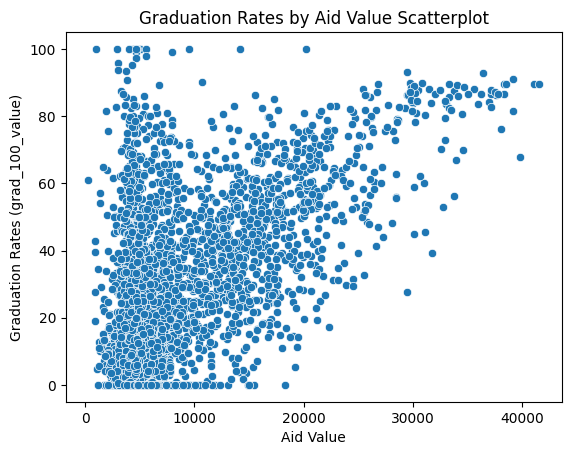

In [30]:
#Scatterplot of grad_100_value by aid_value
sns.scatterplot(data=df, x='aid_value', y='grad_100_value')
plt.title('Graduation Rates by Aid Value Scatterplot')
plt.xlabel('Aid Value')
plt.ylabel('Graduation Rates (grad_100_value)')
plt.show()

There is somewhat of a positive relationship between graduation rates and aid value. It seems that lower graduation rates correlate with less aid and higher graduation rates correlate with more aid.

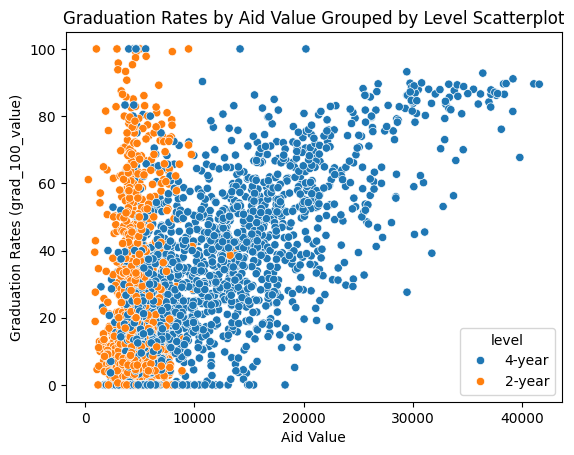

In [31]:
#Grouped by level
sns.scatterplot(data=df, x='aid_value', y='grad_100_value', hue='level')
plt.title('Graduation Rates by Aid Value Grouped by Level Scatterplot')
plt.xlabel('Aid Value')
plt.ylabel('Graduation Rates (grad_100_value)')
plt.show()

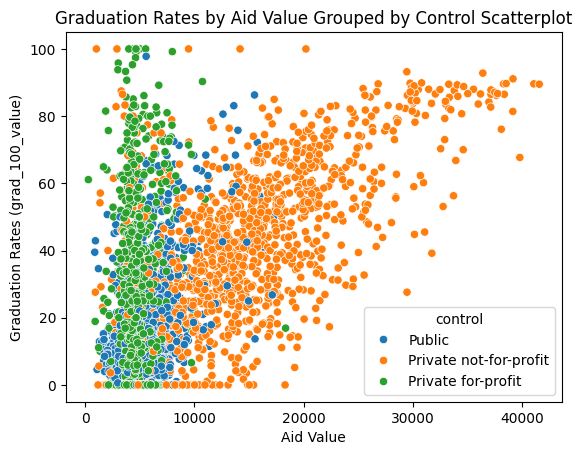

In [32]:
#Grouped by control
sns.scatterplot(data=df, x='aid_value', y='grad_100_value', hue='control')
plt.title('Graduation Rates by Aid Value Grouped by Control Scatterplot')
plt.xlabel('Aid Value')
plt.ylabel('Graduation Rates (grad_100_value)')
plt.show()

When grouped by level, it seems that more aid increases graduation rates for 4-year institutions the most. When grouped by control, it looks as if aid increases graduation rates for private-not-for-profit institutions. It seems overall that aid increases graduation rates for 4-year private not-for-profit institutions.